# Generate random data

## Random numeric data

In [1]:
import numpy as np
np.random.seed(90)
numeric_data = np.random.randn(50, 2)

## Random text data

In [10]:
import pandas as pd

text_data = pd.DataFrame({
    "text_col": [
        "This TEXT needs \t\t\tsome cleaning!!!...", 
        "This text too!!...       ", 
        "Yes, you got it right!\n This one too\n"
    ]
})

# Example of Agglomerative Clustering


In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

# pipeline = make_pipeline(
#     # TfidfVectorizer(stop_words)

# )

data = numeric_data 
model = AgglomerativeClustering(n_clusters=8)

model.fit(data)


AgglomerativeClustering(n_clusters=8)

In [78]:
Z = model.children_
Z   

array([[14, 46],
       [15, 49],
       [10, 41],
       [28, 37],
       [ 6, 34],
       [23, 35],
       [ 0, 33],
       [22, 50],
       [ 7, 13],
       [36, 39],
       [38, 47],
       [24, 30],
       [16, 20],
       [ 9, 17],
       [27, 57],
       [18, 43],
       [32, 53],
       [26, 55],
       [ 4, 12],
       [54, 66],
       [25, 48],
       [52, 64],
       [ 2,  3],
       [40, 60],
       [42, 59],
       [11, 62],
       [19, 58],
       [31, 65],
       [56, 61],
       [ 1, 78],
       [ 5, 44],
       [ 8, 68],
       [45, 81],
       [67, 74],
       [72, 73],
       [29, 80],
       [51, 69],
       [63, 77],
       [70, 79],
       [75, 76],
       [71, 83],
       [21, 84],
       [86, 91],
       [88, 90],
       [87, 89],
       [85, 93],
       [82, 94],
       [92, 95],
       [96, 97]], dtype=int64)

## Visualizing with Dendrogram

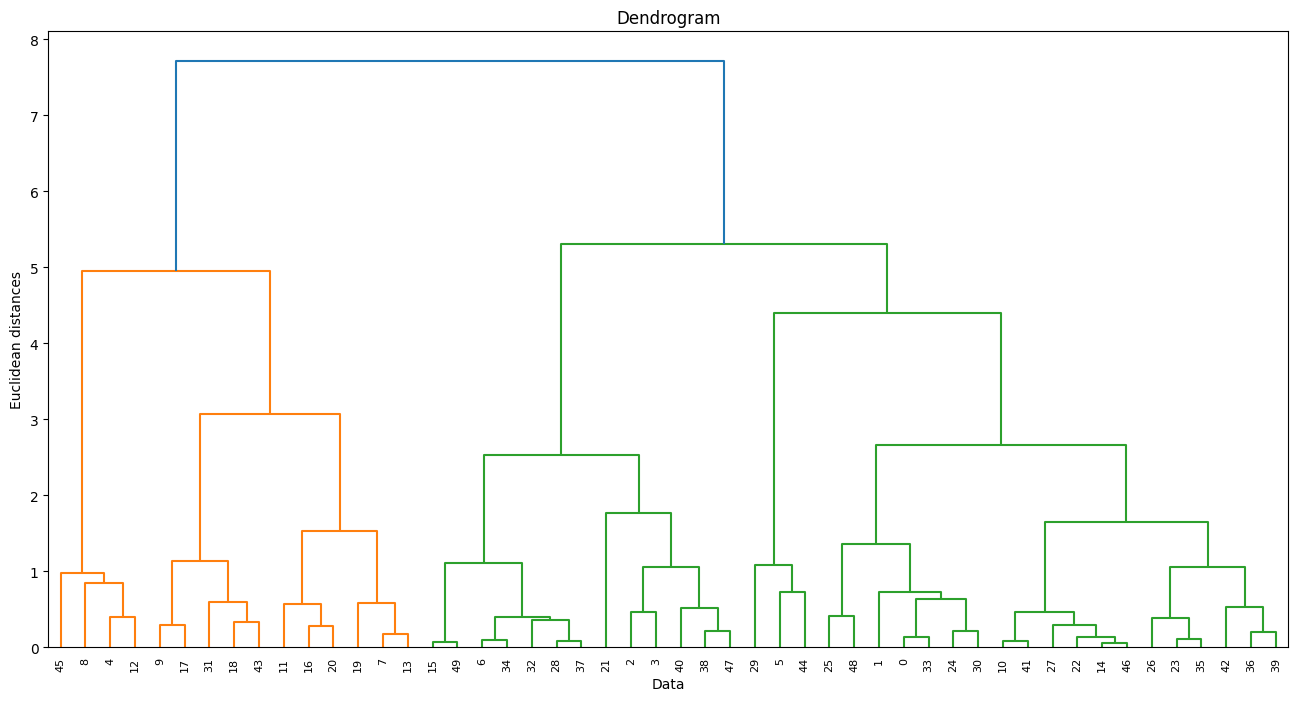

In [10]:
# importing the required module
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
# graph size
plt.figure(1, figsize = (16 ,8))
# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [74]:
from scipy.cluster.hierarchy import linkage, ward, fcluster

fcluster(Z, criterion='distance', t=10)

TypeError: Linkage matrix 'Z' must contain doubles.

- Using Elbow method for estimating number of clusters

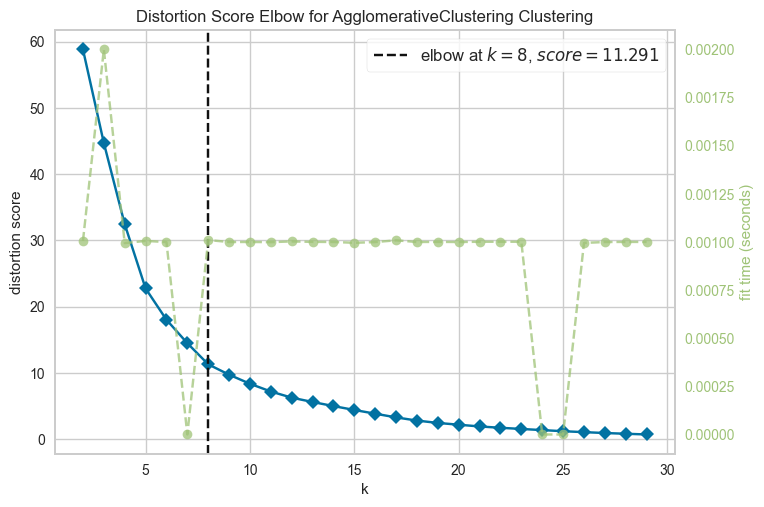

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2, 30), metric='distortion', timing=False)
visualizer.fit(data)
visualizer.show()

- Using Silhouette Visualizor

In [27]:
# Wrapper Class for AgglomerativeClustering model

class AggloWrapper:
    def __init__(self, model):
        self.model = model
    def predict(self, data):
        return self.model.fit_predict(data)

> Remark: Cannot do SilhouetteVisualizer using Yellobrick

The problem is from the need of `predict` method in the clustering model but AgglomerativeClustering uses `fit_predict` instead of `predict`. Therefore, the model is incompatible with Yellobrick SilhouetteVisualizer.

In [ ]:
# from yellowbrick.cluster import SilhouetteVisualizer

# wrapped_model = AggloWrapper(AgglomerativeClustering())

# vis = SilhouetteVisualizer(wrapped_model, force_model=True)
# vis.fit(data)
# vis.show()

# Example of KMeans Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Generate example data
np.random.seed(90)
original_data = np.random.randn(50, 2)

# Kmeans model
kmeans = KMeans(n_clusters=3)

# Fit the moodel with randomed data
kmeans.fit(original_data)

# Predict cluster assignment for original data
cluster_assignment = kmeans.predict(original_data)

# map cluster to original data
mapped_data = np.column_stack((original_data, cluster_assignment))
# mapped_data = pd.DataFrame({'x': original_data[0], 'y': original_data[1], 'cluster': cluster_assignment})

print(type(original_data[0]))
# print(mapped_data)


<class 'numpy.ndarray'>


# Example of Text Vectorizer using Bag-of-words approach

In [11]:
# Vectorizing text using Bag-of-word method with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_representation = vectorizer.fit_transform(text_data['text_col'])
# bow_representation
print(vectorizer.get_feature_names_out())
print(bow_representation.toarray())
print(type(bow_representation))

['cleaning' 'got' 'it' 'needs' 'one' 'right' 'some' 'text' 'this' 'too'
 'yes' 'you']
[[1 0 0 1 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0]
 [0 1 1 0 1 1 0 0 1 1 1 1]]
<class 'scipy.sparse.csr.csr_matrix'>


# Latent Dirichlet Allocation Example

In [12]:
# Latent Dirichlet Allocation example
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer(r'\w+')
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        tokenizer = tokenizer.tokenize)

train_data = tfidf.fit_transform(text_data['text_col'])

In [13]:
lda = LatentDirichletAllocation(n_components=5)
lda_matrix = lda.fit_transform(train_data)

# Get Components 
lda_matrix

array([[0.07365551, 0.07358351, 0.07662975, 0.70247572, 0.07365551],
       [0.10005257, 0.10001601, 0.59893558, 0.10094327, 0.10005257],
       [0.07330893, 0.70689708, 0.07324889, 0.07323617, 0.07330893]])

In [43]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

A = [
   [0, 0], [0, 1], [1, 0],
   [0, 3], [0, 2], [1, 4],
   [3, 0], [2, 0], [4, 1],
   [3, 3], [2, 3], [4, 3]
]

a1 = pdist(A)
for a in a1:
    print(a)


1.0
1.0
3.0
2.0
4.123105625617661
3.0
2.0
4.123105625617661
4.242640687119285
3.605551275463989
5.0
1.4142135623730951
2.0
1.0
3.1622776601683795
3.1622776601683795
2.23606797749979
4.0
3.605551275463989
2.8284271247461903
4.47213595499958
3.1622776601683795
2.23606797749979
4.0
2.0
1.0
3.1622776601683795
3.605551275463989
3.1622776601683795
4.242640687119285
1.0
1.4142135623730951
4.242640687119285
3.605551275463989
4.47213595499958
3.0
2.0
4.0
2.23606797749979
3.605551275463989
2.8284271247461903
4.123105625617661
3.1622776601683795
2.23606797749979
4.123105625617661
4.47213595499958
4.123105625617661
4.242640687119285
2.23606797749979
1.4142135623730951
3.1622776601683795
1.0
1.4142135623730951
3.0
3.1622776601683795
3.1622776601683795
2.23606797749979
3.1622776601683795
3.0
3.605551275463989
2.23606797749979
2.8284271247461903
2.0
1.0
1.0
2.0


In [44]:
a2 = ward(a1)
a2

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 2.        ,  7.        ,  1.        ,  2.        ],
       [ 3.        ,  4.        ,  1.        ,  2.        ],
       [ 9.        , 10.        ,  1.        ,  2.        ],
       [ 6.        ,  8.        ,  1.41421356,  2.        ],
       [11.        , 15.        ,  1.73205081,  3.        ],
       [ 5.        , 14.        ,  2.081666  ,  3.        ],
       [12.        , 13.        ,  2.23606798,  4.        ],
       [16.        , 17.        ,  3.94968353,  5.        ],
       [18.        , 19.        ,  5.15012714,  7.        ],
       [20.        , 21.        ,  6.4968857 , 12.        ]])